# Homework 5: Classification (50 points)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 5 is due on Friday May 6, 11:59 


In [1]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Intuition on classification (16 points)

#### Question 1.1 (8 points)
You have a large dataset `breast-cancer` which has 11 columns. The first ten are attributes of the person that might be predictive of whether or not someone has breast-cancer, and the 11th column indicates whether they have it or not. 99% of the table contains examples of people who do not have breast cancer. 

Imagine you are trying to use a k-NN classifier to use the first ten columns to predict whether or not someone has breast cancer. You split your training and test set up as necessary, you develop a 7 Nearest Neighbors classifier, and you notice your classifier predicts every point in the test set to be a person who does not have breast cancer. Is there a problem with your code? Explain this phenomenon.   

In [ ]:
# k-NN Classifier 
# have one data point --> supervised learning algorithm, you train on multiple features
# for cancer --> features are binary/non-binnary --> correspond with column numbers
# Take euclidian distance between the point of interest and every other point with features 
# training to have the most accurate/optimum k value for nearest neighbors by running trial
# and error over various k values
# you look at which k value happens to have the highest accuracy
# Unlikely because there is a big imbalance between people who have cancer vs. people who do
# not have cancer so it is very unlikely for the algother 4 or more of cancer positive nearest 
# neighbors to be right next to the point of interest

It's unlikely because there is a big imbalance between people who have cancer vs. people who do not have cancer if 99% of the table has people who do not have breast cancer so it is very unlikely for the algorithm to have 4 or more of cancer positive nearest neighbors to be right next to the point of interest.

#### Question 1.2 (8 points)

You have a training set of 35 examples of characteristics of fruits along with what fruit is actually being described. 25 of the examples of Apples, and 10 of the examples are Oranges. 

You decide to make a k-NN classifier. Give the smallest possible choice for k such that the classifier will predict Apple for every point, regardless of how the data is spread out. Explain how you picked your k. 

Imagine that ties are broken at random for even values of k, so there is no guarantee of what will be picked if there is a tie.

In [ ]:
# Use k = 21

I would make k = 21 because this will allow for the nearest neighbors that happen to be oranges to always be outnumbered because there are only 10 oranges in the entire set regardless of how it's spread out.

## 2. Cars classification (34 points) ##

The data below contains 397 observations on the following 9 variables:
-    mpg: miles per gallon

-    cylinders: number of cylinders between 4 and 8

-    displacement: engine displacement (cu. inches)

-    horsepower: engine horsepower

-    weight: vehicle weight (lbs.)

-    acceleration: time to accelerate from 0 to 60 mph (sec.)

-    year: model year (modulo 100)

-    origin: origin of car (1. American, 2. European, 3. Japanese)




In [18]:
# this commands loads the data into a data frame
auto_df=pd.read_csv("auto.csv")
auto_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [3]:
auto_df.shape

(397, 9)

#### Question 2.1 ( Binarization, 3 points)

Create a new column in the data frame containing a binary variable called **mpg_b**: it should be equal to 1 if **mpg** contains a value above its median and equal to 0 if **mpg** contains a value below its median.

In [28]:
# Calculating median values for mpg
mpg_med = auto_df["mpg"].median()
mpg_med # = 23 mpg

# Creating new empty mpg_b column
auto_df["mpg_b"] = pd.Series()

# Index counter
index = 0

# For loop to iterate over each mpg value in the row
# and binarize it to either 0 or 1
for x in auto_df["mpg"]:
    mpg_med_val = mpg_med
    if x > mpg_med_val:
        auto_df["mpg_b"][index] = 1
    else:
        auto_df["mpg_b"][index] = 0
    index+=1

# Checking to see if for loop works --> yes!
auto_df["mpg_b"].tail(10)

/var/folders/d0/fxj44wqx1gg93vzw2qsyk67w0000gn/T/ipykernel_38498/292907490.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  auto_df["mpg_b"] = pd.Series()
/var/folders/d0/fxj44wqx1gg93vzw2qsyk67w0000gn/T/ipykernel_38498/292907490.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_df["mpg_b"][index] = 0
/var/folders/d0/fxj44wqx1gg93vzw2qsyk67w0000gn/T/ipykernel_38498/292907490.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_df["mpg_b"][index] = 1


387    1.0
388    0.0
389    1.0
390    1.0
391    1.0
392    1.0
393    1.0
394    1.0
395    1.0
396    1.0
Name: mpg_b, dtype: float64

#### Question 2.2 (Numerical and graphical summaries, 7 points)

Explore the data graphically (and numerically if you think it is useful) in order to investigate the association between **mpg_b** and the other features.  Which of the other features seem most likely to be useful in predicting **mpg_b**? Describe your findings.


In [17]:
# Plot mpg_b vs. cylinders (maybe), displacement, horsepower, weight, and acceleration

In [ ]:
# create two different data frames, one with lower value and one with higher value

In [ ]:
auto_df.columns

ConversionError: Failed to convert value(s) to axis units: array(['95.00', '88.00', '46.00', '87.00', '90.00', '95.00', '113.0',
       '88.00', '90.00', '95.00', '?', '90.00', '70.00', '76.00', '65.00',
       '69.00', '60.00', '70.00', '95.00', '80.00', '69.00', '92.00',
       '80.00', '88.00', '46.00', '90.00', '49.00', '75.00', '110.0',
       '67.00', '80.00', '65.00', '75.00', '83.00', '67.00', '78.00',
       '52.00', '61.00', '75.00', '75.00', '75.00', '97.00', '93.00',
       '67.00', '75.00', '96.00', '71.00', '97.00', '70.00', '115.0',
       '53.00', '86.00', '81.00', '92.00', '79.00', '83.00', '81.00',
       '52.00', '60.00', '70.00', '53.00', '71.00', '70.00', '75.00',
       '72.00', '68.00', '80.00', '58.00', '96.00', '70.00', '78.00',
       '88.00', '75.00', '89.00', '63.00', '83.00', '67.00', '78.00',
       '48.00', '66.00', '52.00', '70.00', '60.00', '88.00', '68.00',
       '95.00', '97.00', '75.00', '105.0', '85.00', '97.00', '71.00',
       '68.00', '71.00', '65.00', '80.00', '80.00', '77.00', '71.00',
       '90.00', '70.00', '70.00', '65.00', '69.00', '90.00', '115.0',
       '115.0', '90.00', '76.00', '60.00', '70.00', '65.00', '90.00',
       '88.00', '90.00', '78.00', '90.00', '75.00', '92.00', '75.00',
       '65.00', '105.0', '65.00', '48.00', '48.00', '67.00', '67.00',
       '67.00', '?', '67.00', '62.00', '132.0', '100.0', '88.00', '?',
       '72.00', '84.00', '84.00', '92.00', '110.0', '84.00', '58.00',
       '64.00', '60.00', '67.00', '65.00', '62.00', '68.00', '63.00',
       '65.00', '65.00', '74.00', '?', '75.00', '75.00', '100.0', '74.00',
       '80.00', '76.00', '116.0', '120.0', '105.0', '88.00', '88.00',
       '88.00', '85.00', '84.00', '90.00', '92.00', '74.00', '68.00',
       '68.00', '63.00', '70.00', '88.00', '75.00', '70.00', '67.00',
       '67.00', '67.00', '110.0', '85.00', '92.00', '96.00', '84.00',
       '90.00', '86.00', '52.00', '84.00', '79.00', '82.00'], dtype=object)

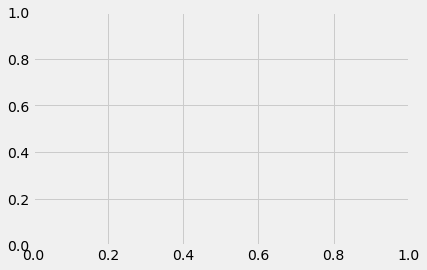

In [39]:
# find number of bins that fit both graphs
plt.hist(auto_df.loc[auto_df["mpg_b"] == True], color="green", alpha=0.45)

(array([107.,  89.,  30.,  13.,  57.,   3.,  42.,  31.,  16.,   9.]),
 array([ 68. , 106.7, 145.4, 184.1, 222.8, 261.5, 300.2, 338.9, 377.6,
        416.3, 455. ]),
 <BarContainer object of 10 artists>)

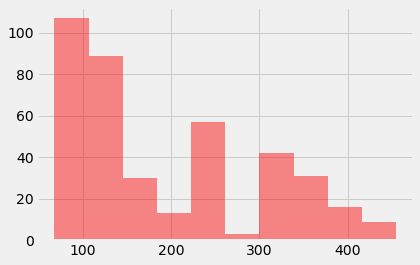

In [33]:
plt.hist(auto_df["displacement"], color="red", alpha=0.45)

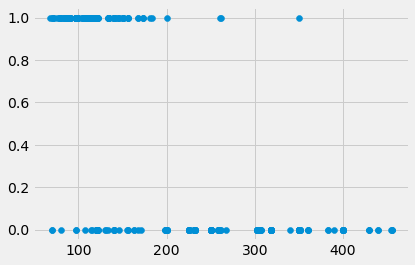

In [29]:
# mpg_b vs. displacement visualization
# could change opacity
# Could use histograms, violin graphs, cumulative plots, box plots
x = auto_df["displacement"]
y = auto_df["mpg_b"]
plt.scatter(x,y)

*Write your answer here, replacing this text.*

#### Question 2.3 (Split the data, 3 points)

Split the data into a training set and a test set. Select **randomly** 50 rows of your data frame and extract their data into a test data frame. The rest of the 347 rows should form your training data frame.

In [ ]:
# code here and in additional cells if needed
...

#### Question 2.4 (kNN for mpg_b, 10 points)

The goal here is to construct a kNN algorithm that has high **accuracy** (proportion of test examples labeled correctly). Recall that you have to take into consideration: (i) the type of features (categorical, quantitative); (ii) the scaling of the features; (iii) the distance you use; (iv) the features in the model; (v) the number of neighbors, k.

You can choose to use only the variables that seem most asociated with **mpg_b** in Q2.2. Try several values of k, and report on your test errors. Which value of k performs best?

**Note:** You need to write the code for the algorithm and not use kNN functions in Python libraries. You may use any of the functions we wrote in the lecture notebooks.


In [ ]:
# code here and in additional cells if needed
...

*Write your answer here, replacing this text.*

#### Question 2.5 (kNN for country of origin, 14 points)

The goal here is to construct a kNN algorithm for classfication of country of origin. Instructions are similar to those in Q2.4 - the main difference is that `origin` has 3 labels so you need to modify your code to account for that. This is an example of **multiclass classification**.

Issues to consider:
- as before, you need training and testing data
- try several values of k 
- feature selection, scaling, distance are important
- are the three groups balanced?
- how do you break ties?

**Hints (on tie breaking)**: (i) random selection between tied labels; (ii) use the distances when tied (closer neighbors are more relevant).

In [ ]:
# code here and in additional cells if needed
...

*Write your answer here, replacing this text.*